## Adapted from:

*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# k Nearet Neighbor (kNN)

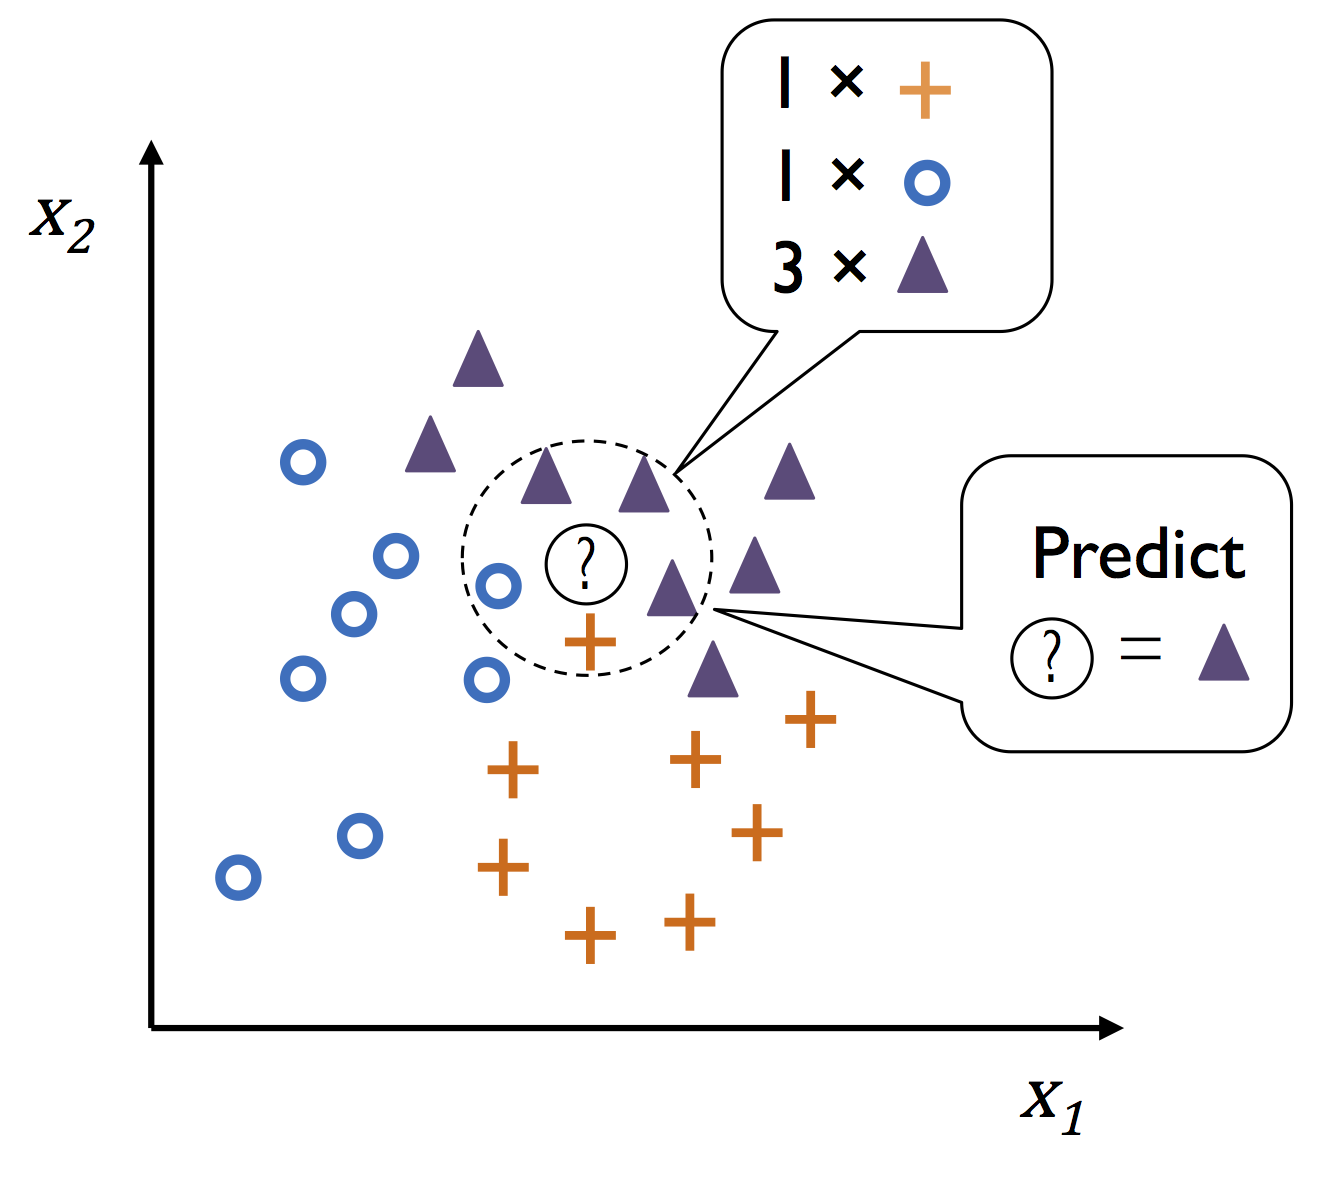

In [1]:
from IPython.display import Image
%matplotlib inline

Image(filename='images/03_23.png', width=500) 

In [2]:
# define plot_decision_regions for later use

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

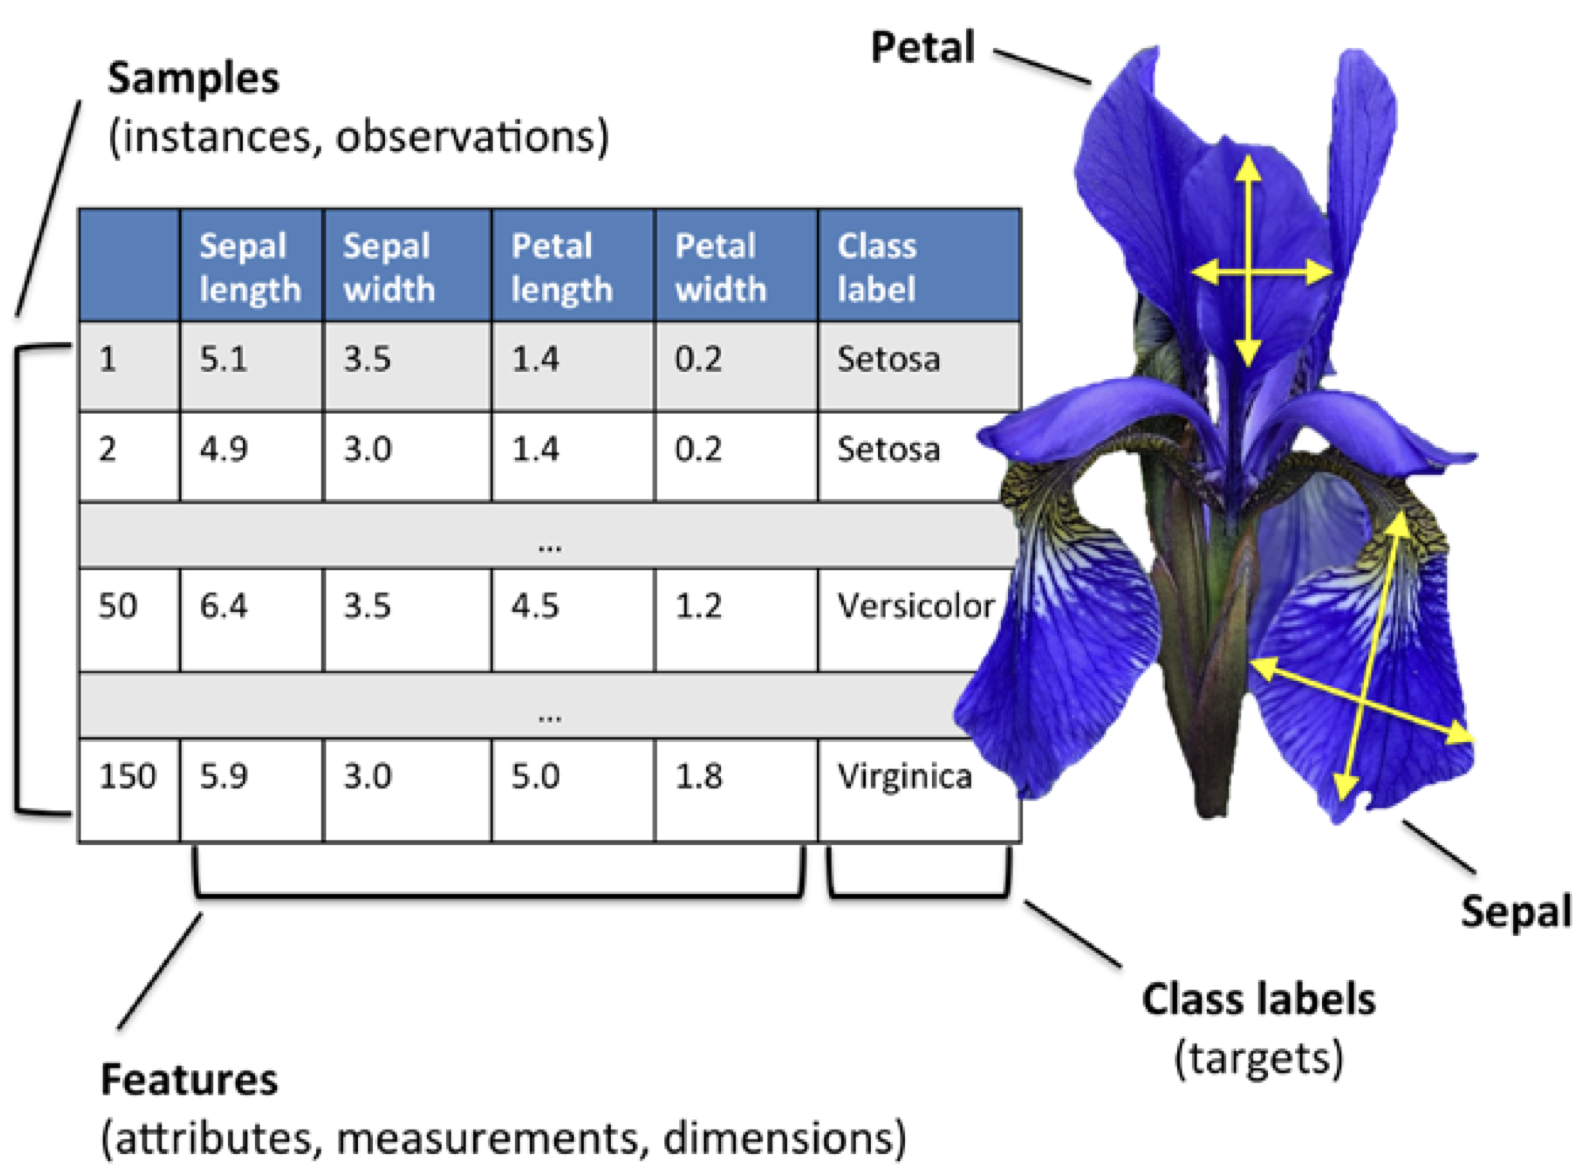

# Load the Iris dataset

In [2]:
import numpy as np
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

iris = pd.read_csv(s, header=None)
iris


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]

### Perform Exploratory Data Analysis according to ICHW 1


# Steps to build ML model in sklean

In [5]:
# 1. Arrange the data into featues and target arrays.

In [6]:
# extract petal length and petal width
# X = iris.iloc[:,[0, 1]]
# y = iris.iloc[:,4]
# X = iris.iloc[:, :-1]
# y = iris.iloc[:, -1]

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [7]:
# change y from categorical to numeric
y = pd.factorize(iris[4])[0]
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]
(105, 2)
(45, 2)
       0    1
33   5.5  4.2
20   5.4  3.4
115  6.4  3.2
124  6.7  3.3
35   5.0  3.2
..   ...  ...
41   4.5  2.3
92   5.8  2.6
26   5.0  3.4
3    4.6  3.1
42   4.4  3.2

[105 rows x 2 columns]


In [11]:
# 3. Select the ML algorithm, and its parameteters

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#scaler = StandardScaler()

#X_train_std = scaler.fit_transform(X_train)

#X_test_std = scaler.transform(X_test)


scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
X_train_normal= scaler.transform(X_train) # the scaler is applied to the training set
X_test_normal = scaler.transform(X_test) # the scaler is applied to the test set

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

#knn=KNeighborsClassifier(3)
#knn.fit(X_train_normal, y_train)
#y_pred_sklearn= knn.predict(X_test)
#print(y_pred_sklearn)

In [14]:
# 4. Build the model (.fit)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
X_train_normal= scaler.transform(X_train) # the scaler is applied to the training set
X_test_normal = scaler.transform(X_test) # the scaler is applied to the test set

print(X_test_normal)

[[0.87681241 0.48083261]
 [0.81067923 0.58549055]
 [0.80417614 0.59439106]
 [0.89076187 0.45447034]
 [0.91036648 0.41380294]
 [0.90882955 0.41716766]
 [0.93690259 0.34959052]
 [0.94242775 0.33440985]
 [0.92136416 0.38870051]
 [0.81067923 0.58549055]
 [0.79159032 0.61105218]
 [0.89734997 0.44131966]
 [0.8349582  0.55031336]
 [0.89806271 0.43986745]
 [0.8209052  0.57106449]
 [0.9246781  0.38074981]
 [0.9121687  0.40981492]
 [0.88147997 0.47222141]
 [0.91085325 0.41273038]
 [0.90795938 0.41905818]
 [0.92114622 0.38921671]
 [0.8479983  0.52999894]
 [0.90756252 0.41991699]
 [0.89442719 0.4472136 ]
 [0.90076868 0.43429919]
 [0.88583154 0.46400699]
 [0.89792072 0.44015722]
 [0.89708903 0.44184982]
 [0.81923192 0.57346234]
 [0.91578821 0.4016615 ]
 [0.81602448 0.57801734]
 [0.82451335 0.5658425 ]
 [0.93887632 0.34425465]
 [0.92257988 0.38580613]
 [0.92935209 0.36919466]
 [0.9149178  0.40364021]
 [0.84507884 0.53464171]
 [0.85749293 0.51449576]
 [0.8528513  0.52215386]
 [0.90947448 0.41575976]


/tmp/ipykernel_280/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_280/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


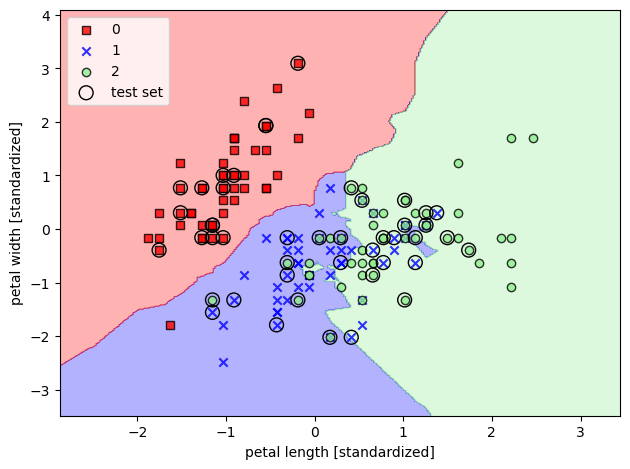

In [16]:
knn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [17]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)

In [18]:
from sklearn import metrics 
y_pred = knn.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.7111111111111111
